# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

MSE

In [24]:
model.compile(loss="MSE", optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [25]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 220s 6ms/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1742
Epoch 2/10
40000/40000 [==============================] - 220s 6ms/step - loss: 0.0887 - acc: 0.1653 - val_loss: 0.0884 - val_acc: 0.2257
Epoch 3/10
40000/40000 [==============================] - 223s 6ms/step - loss: 0.0871 - acc: 0.2063 - val_loss: 0.0869 - val_acc: 0.2585
Epoch 4/10
40000/40000 [==============================] - 222s 6ms/step - loss: 0.0851 - acc: 0.2444 - val_loss: 0.0852 - val_acc: 0.2809
Epoch 5/10
40000/40000 [==============================] - 223s 6ms/step - loss: 0.0835 - acc: 0.2686 - val_loss: 0.0839 - val_acc: 0.3044
Epoch 6/10
40000/40000 [==============================] - 222s 6ms/step - loss: 0.0824 - acc: 0.2917 - val_loss: 0.0831 - val_acc: 0.3191
Epoch 7/10
40000/40000 [==============================] - 223s 6ms/step - 

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

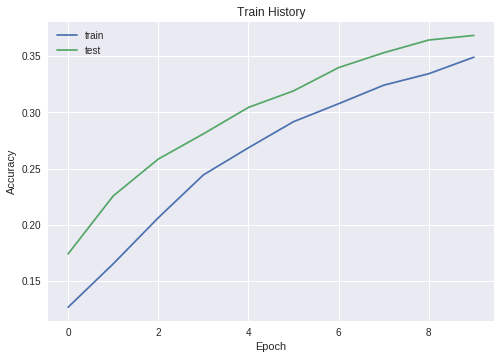

In [27]:
show_train_history('acc','val_acc')

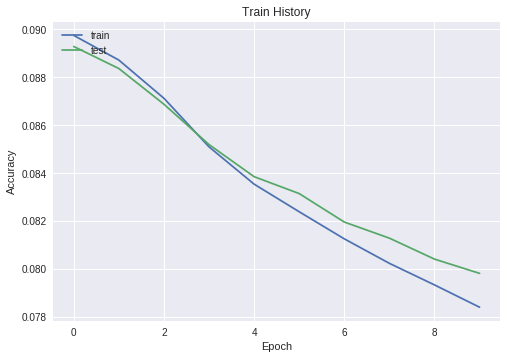

In [28]:
show_train_history('loss','val_loss')

binary _crossentropy

In [32]:
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [33]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 223s 6ms/step - loss: 0.2665 - acc: 0.9040 - val_loss: 0.2691 - val_acc: 0.9009
Epoch 2/10
40000/40000 [==============================] - 222s 6ms/step - loss: 0.2537 - acc: 0.9059 - val_loss: 0.2568 - val_acc: 0.9018
Epoch 3/10
40000/40000 [==============================] - 221s 6ms/step - loss: 0.2441 - acc: 0.9079 - val_loss: 0.2482 - val_acc: 0.9034
Epoch 4/10
40000/40000 [==============================] - 223s 6ms/step - loss: 0.2361 - acc: 0.9100 - val_loss: 0.2396 - val_acc: 0.9059
Epoch 5/10
40000/40000 [==============================] - 224s 6ms/step - loss: 0.2290 - acc: 0.9119 - val_loss: 0.2342 - val_acc: 0.9078
Epoch 6/10
40000/40000 [==============================] - 225s 6ms/step - loss: 0.2228 - acc: 0.9141 - val_loss: 0.2261 - val_acc: 0.9100
Epoch 7/10
40000/40000 [==============================] - 226s 6ms/step - loss: 0.2177 - acc: 0.9151 - val_loss: 0.2224 - 

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

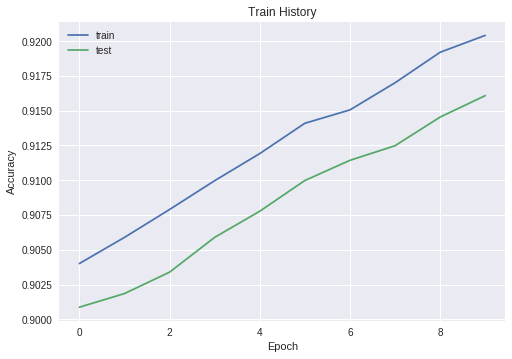

In [35]:
show_train_history('acc','val_acc')

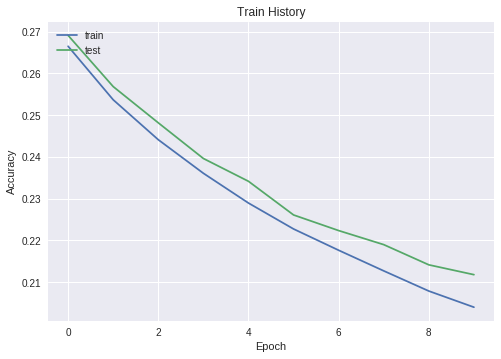

In [36]:
show_train_history('loss','val_loss')

# 在這組資料下使用binary_crossentropy的結果較MSE好上很多